# Análisis Forraje Regresion Lineal Multiple

## CONCLUSIÓN: No se obtienen buenas metricas, están muy parecidas a la de regresio lineal simple...

## Realizamos importaciones

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Leemos nuestro archivo de entrada

In [2]:
resul = pd.read_csv('datos/csv/datos_forraje_3_sondas.csv', sep=",")
resul

,feacha,codigo_gps,coordenada_completa,latitud,longitug,fn_valor_pastoral,dist_laguna_fría,distancia_telsen,dist_gastre,sonda_cercana,sonda_real,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,11/2015,CG T01,-68.7056907/-43.291952,-43.291952,-68.705691,3.6,1.437643,2.597643,0.477643,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
1,11/2015,CG T02,-68.6608421/-43.2535963,-43.253596,-68.660842,0.6,1.354438,2.514438,0.394438,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
2,11/2015,CG T03,-68.616647/-43.2181445,-43.218145,-68.616647,1.6,1.274792,2.434792,0.314792,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
3,11/2015,CG T04,-68.6180901/-43.1667136,-43.166714,-68.618090,8.0,1.224804,2.384804,0.264804,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
4,11/2015,CG T05,-68.6390379/-43.1237455,-43.123745,-68.639038,4.4,1.202783,2.362783,0.242783,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,CT2 T21,-65.9446227/-42.6019474,-42.601947,-65.944623,15.4,2.013430,0.853430,2.973430,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
196,01/2017,CT2 T22,-65.9904844/-42.577312,-42.577312,-65.990484,11.2,1.992204,0.832204,2.952204,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
197,01/2017,CT2 T23,-66.0338334/-42.5443476,-42.544348,-66.033833,13.0,1.981819,0.821819,2.941819,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
198,01/2017,CT2 T24,-66.082257/-42.5184357,-42.518436,-66.082257,11.4,1.959307,0.799307,2.919307,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6


## Estadisticas de los datos

In [3]:
resul.describe()

,latitud,longitug,fn_valor_pastoral,dist_laguna_fría,distancia_telsen,dist_gastre,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,-42.740748,-67.915592,8.758000,0.917748,1.420959,0.959369,206.706000,39.439000,15.886500,4.648500,10.28950,10.488500,50.619000
std,0.290505,0.912005,5.935147,0.485753,0.793833,0.947505,72.859119,19.817349,2.519685,1.698062,2.10578,3.263629,3.536989
min,-43.313997,-69.216771,0.000000,0.047987,0.000160,0.011856,119.800000,13.700000,14.300000,2.600000,8.50000,5.100000,40.900000
25%,-42.923910,-68.577835,3.800000,0.535329,0.718245,0.169017,142.300000,13.700000,14.300000,3.900000,9.10000,6.300000,48.600000
50%,-42.664940,-68.102476,8.300000,1.011893,1.536611,0.583389,185.200000,47.900000,14.300000,3.900000,9.10000,12.000000,52.100000
75%,-42.519414,-67.349483,12.850000,1.173102,2.179888,1.779100,288.100000,58.200000,19.800000,7.200000,13.60000,12.000000,52.100000
max,-42.364297,-65.944623,29.400000,2.013430,2.597643,2.973430,304.100000,58.200000,20.000000,7.300000,13.60000,14.200000,53.700000


Son 200 registros.

El valor pastoral va del 0.0 al 29.4,con una media de 8.75 y a partir del desvío estándar podemos ver que la mayoría están entre 8.75-5.93 y 8.75+5.93.

El acumulado anual va de 119.8 hasta 304.1, con una media de 206.7 y a partir del desvío estándar podemos ver que la mayoría están entre 206.7-72.85 y 206.7+72.85.

## Matriz de Correlación

<AxesSubplot:>

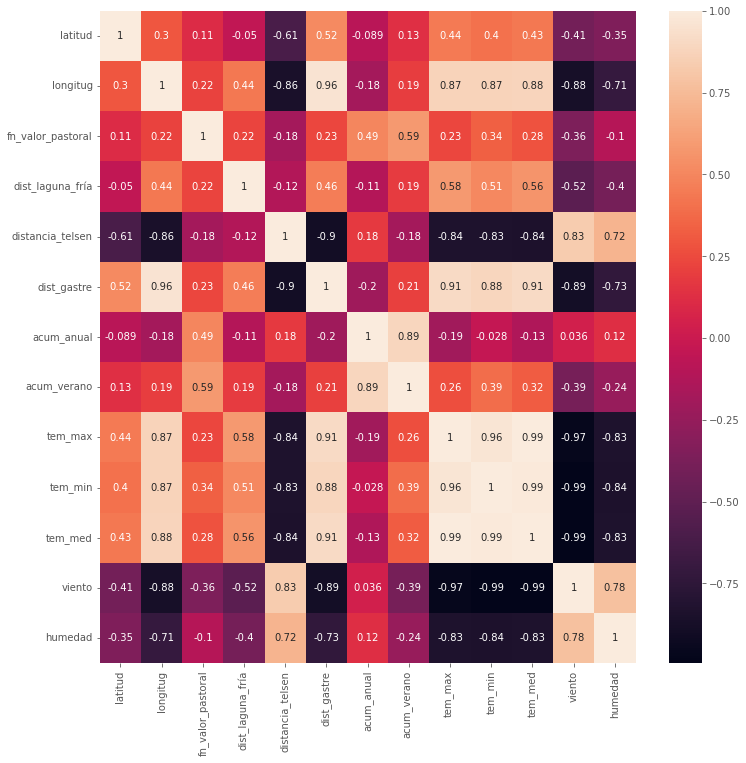

In [3]:
correlation_mat = resul.corr()
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlation_mat, annot = True, ax = ax)

Segun la matriz el valor pastoral esta medianamente correlacionado con la lluvia: 0.49 para anual y 0.59 para el verano. Y una baja correlacion para temperatura minimia con 0.34.

## Primera Predicción

Variables independientes: 
- mm de lluvia acumulados en Verano
- mm de lluvia acumulados Anual

Variables dependientes:
- Valor Pastoral

### Creando modelo

In [4]:
X_multiple = resul[['acum_anual','acum_verano']]
y_multiple = resul[['fn_valor_pastoral']]

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.4)

lr_multiple = linear_model.LinearRegression()

lr_multiple.fit(X_train, y_train)

LinearRegression()

### METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será. 

El problema del coeficiente de determinación, y razón por el cual surge el coeficiente de determinación ajustado, radica en que no penaliza la inclusión de variables explicativas no significativas. Es decir, si al modelo se añaden cinco variables explicativas que guardan poca relación con lo que se intenta predecir, el R cuadrado aumentará. Es por ello que muchos expertos económetras, estadísticos y matemáticos se oponen al uso del R cuadrado como medida representativa de la bondad del ajuste real.

Quizas se podría programar el coeficiente de determinación ajustado

In [11]:
Y_pred_multiple = lr_multiple.predict(X_test)

print('Precisión del modelo entrenamiento:')
print(str(round(lr_multiple.score(X_train, y_train),4))+'%')

print('Precisión del modelo test:')
print(str(round(lr_multiple.score(X_test, y_test),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, Y_pred_multiple),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, Y_pred_multiple),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, Y_pred_multiple),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test, Y_pred_multiple),4)),4)))
print('R2:')
print(str(round(r2_score(y_test, Y_pred_multiple),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', lr_multiple.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', lr_multiple.intercept_)

Precisión del modelo entrenamiento:
0.3127%
Precisión del modelo test:
0.4097%
Varianza Explicada:
0.4327
MAE:
3.3492
MSE:
16.2519
RMSE:
4.0314
R2:
0.4097
Coefficients: 
 [[-0.00850996  0.20604013]]
Independent term: 
 [2.70924172]


- La Varianza Explicada es de 0.4327, o sea 0.43. ¿Qué significa esto? Qué los datos están dispersos un 43%, y al tener un valor por debajo de 1.0, es una metrica baja.
- El Error medio absoluto (MAE) es de 3.3492, o sea 3.35. ¿Qué significa esto? Qué en promedio se equivoca 3.35 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 3.35 es medianamente aceptable. Y 3.35 está bastante cerca de 0, lo cual es bueno.
- Error cuadrático medio (MSE) es de 16.2519, o sea 16.25. ¿Qué significa esto? Qué en promedio se equivoca 16.25 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 16.25 no es aceptable. Y 16.25 está lejos de 0, lo cual es malo.
- La Raíz cuadrada del Error cuadrático medio (RMSE) es de 4.0314, o sea 4.03. ¿Qué significa esto? Qué en promedio se equivoca 4.03 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 4.03 es medianamente aceptable. Y 4.03 está bastante cerca de 0, lo cual es bueno.
- El coeficiente de determinación (R2) es de 0.4097, o sea 0.41. ¿Qué significa esto? Qué el ajuste, según el cálculo del R cuadrado, es de 0.41. Esto quiere decir que es un modelo cuyas estimaciones se ajustan maso menos a la variable real. Aunque técnicamente no sería correcto, podríamos decir algo así como que el modelo explica en un 41% a la variable real, o que la calidad del modelo es del 41% o que el rendimiento del modelo es del 41%. Pero teniendo en cuenta que para la regresion multiple hay que usar el R2 ajustado, este no es un valor totalmente correcto. 

<br/>

- La Precisión del modelo en el entrenamiento es de 0.3127%, o sea 31%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 
- La Precisión del modelo en el test es de 0.4097%, o sea 41%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 


**La funcion score() para datos de test y r2_score, dan el mismo resultado. Lo cual coincide con lo que dijo Anele, ambos serian el coeficiente de determinacion.**

*Pero la funcion score() para datos de train, que es como la tome del ejemplo original de regresión multiple (predecir lana a partir de lluvia del dique y cantidad de animales), no sé que signifique.*

CONCLUSIÓN: La palabra precisión no es la correcta me parece

## Grafiquemos los resultados

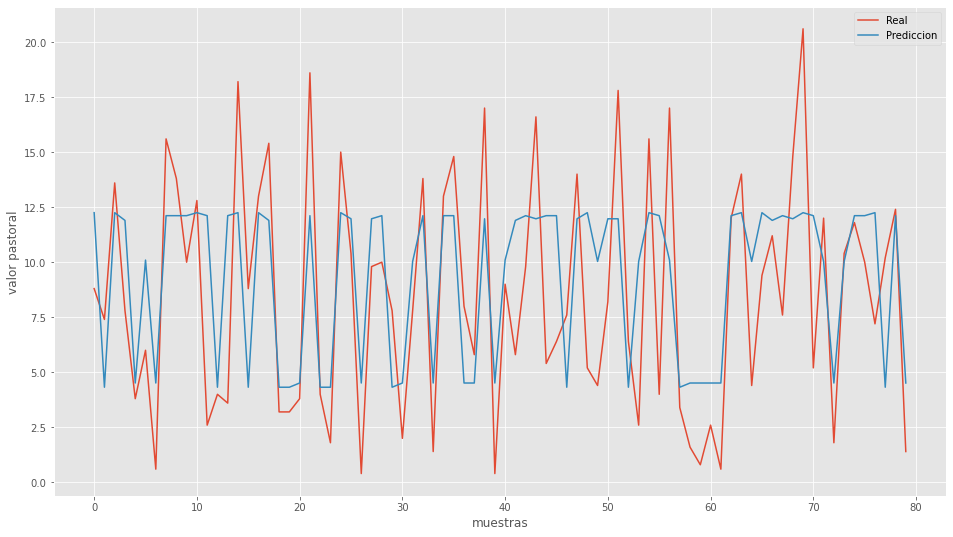

In [12]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(Y_pred_multiple)),Y_pred_multiple,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Segunda Predicción

Variables independientes: 
- temperatura promedio minima anual
- mm de lluvia acumulados Anual

Variables dependientes:
- Valor Pastoral

### Creando modelo

In [13]:
X_multiple = resul[['acum_anual','tem_min']]
y_multiple = resul[['fn_valor_pastoral']]

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.4)

lr_multiple = linear_model.LinearRegression()

lr_multiple.fit(X_train, y_train)

LinearRegression()

### METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será. 

El problema del coeficiente de determinación, y razón por el cual surge el coeficiente de determinación ajustado, radica en que no penaliza la inclusión de variables explicativas no significativas. Es decir, si al modelo se añaden cinco variables explicativas que guardan poca relación con lo que se intenta predecir, el R cuadrado aumentará. Es por ello que muchos expertos económetras, estadísticos y matemáticos se oponen al uso del R cuadrado como medida representativa de la bondad del ajuste real.

Quizas se podría programar el coeficiente de determinación ajustado

In [14]:
Y_pred_multiple = lr_multiple.predict(X_test)

print('Precisión del modelo entrenamiento:')
print(str(round(lr_multiple.score(X_train, y_train),4))+'%')

print('Precisión del modelo test:')
print(str(round(lr_multiple.score(X_test, y_test),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, Y_pred_multiple),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, Y_pred_multiple),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, Y_pred_multiple),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test, Y_pred_multiple),4)),4)))
print('R2:')
print(str(round(r2_score(y_test, Y_pred_multiple),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', lr_multiple.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', lr_multiple.intercept_)

Precisión del modelo entrenamiento:
0.3596%
Precisión del modelo test:
0.3742%
Varianza Explicada:
0.3747
MAE:
3.672
MSE:
21.6121
RMSE:
4.6489
R2:
0.3742
Coefficients: 
 [[0.04029127 1.24607578]]
Independent term: 
 [-5.31291006]


- La Varianza Explicada es de 0.3747, o sea 0.37. ¿Qué significa esto? Qué los datos están dispersos un 37%, y al tener un valor por debajo de 1.0, es una metrica baja.
- El Error medio absoluto (MAE) es de 3.672, o sea 3.67. ¿Qué significa esto? Qué en promedio se equivoca 3.67 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 3.67 es medianamente aceptable. Y 3.67 está bastante cerca de 0, lo cual es bueno.
- Error cuadrático medio (MSE) es de 21.6121, o sea 21.61. ¿Qué significa esto? Qué en promedio se equivoca 21.61 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 21.61 no es para nada aceptable. Y 21.61 muy está lejos de 0, lo cual es malo.
- La Raíz cuadrada del Error cuadrático medio (RMSE) es de 4.6489, o sea 4.65. ¿Qué significa esto? Qué en promedio se equivoca 4.65 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 4.65 es medianamente aceptable. Y 4.65 está bastante cerca de 0, lo cual es bueno.
- El coeficiente de determinación (R2) es de 0.3742, o sea 0.37. ¿Qué significa esto? Qué el ajuste, según el cálculo del R cuadrado, es de 0.37. Esto quiere decir que es un modelo cuyas estimaciones se ajustan poco a la variable real. Aunque técnicamente no sería correcto, podríamos decir algo así como que el modelo explica en un 37% a la variable real, o que la calidad del modelo es del 37% o que el rendimiento del modelo es del 37%. Pero teniendo en cuenta que para la regresion multiple hay que usar el R2 ajustado, este no es un valor totalmente correcto. 

<br/>

- La Precisión del modelo en el entrenamiento es de 0.3596%, o sea 36%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 
- La Precisión del modelo en el test es de 0.3742%, o sea 37%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas.

**La funcion score() para datos de test y r2_score, dan el mismo resultado. Lo cual coincide con lo que dijo Anele, ambos serian el coeficiente de determinacion.**

*Pero la funcion score() para datos de train, que es como la tome del ejemplo original de regresión multiple (predecir lana a partir de lluvia del dique y cantidad de animales), no sé que signifique.*

CONCLUSIÓN: La palabra precisión no es la correcta me parece

## Grafiquemos los resultados

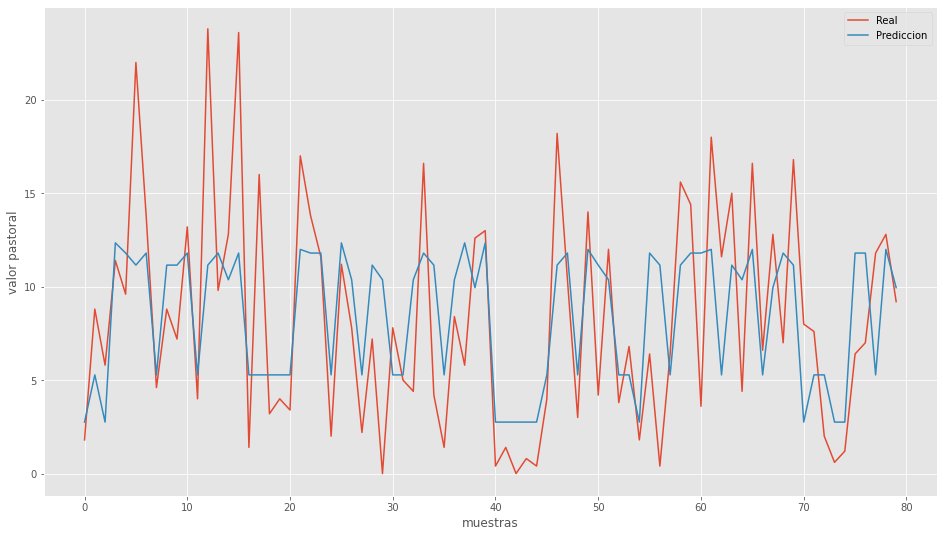

In [15]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(Y_pred_multiple)),Y_pred_multiple,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Tercera Predicción

Variables independientes: 
- temperatura promedio maxima anual
- temperatura promedio minima anual
- temperatura promedio media anual
- humedad
- viento
- mm de lluvia acumulado Verano
- mm de lluvia acumulados Anual

Variables dependientes:
- Valor Pastoral

### Creando modelo

In [16]:
X_multiple = resul[['acum_anual','acum_verano', 'tem_max', 'tem_min', 'tem_med', 'viento', 'humedad']]
y_multiple = resul[['fn_valor_pastoral']]

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.4)

lr_multiple = linear_model.LinearRegression()

lr_multiple.fit(X_train, y_train)

LinearRegression()

### METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será. 

El problema del coeficiente de determinación, y razón por el cual surge el coeficiente de determinación ajustado, radica en que no penaliza la inclusión de variables explicativas no significativas. Es decir, si al modelo se añaden cinco variables explicativas que guardan poca relación con lo que se intenta predecir, el R cuadrado aumentará. Es por ello que muchos expertos económetras, estadísticos y matemáticos se oponen al uso del R cuadrado como medida representativa de la bondad del ajuste real.

Quizas se podría programar el coeficiente de determinación ajustado

In [19]:
Y_pred_multiple = lr_multiple.predict(X_test)

print('Precisión del modelo entrenamiento:')
print(str(round(lr_multiple.score(X_train, y_train),4))+'%')

print('Precisión del modelo test:')
print(str(round(lr_multiple.score(X_test, y_test),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, Y_pred_multiple),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, Y_pred_multiple),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, Y_pred_multiple),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test, Y_pred_multiple),4)),4)))
print('R2:')
print(str(round(r2_score(y_test, Y_pred_multiple),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', lr_multiple.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', lr_multiple.intercept_)

Precisión del modelo entrenamiento:
0.4355%
Precisión del modelo test:
0.4402%
Varianza Explicada:
0.4405
MAE:
3.3968
MSE:
19.1615
RMSE:
4.3774
R2:
0.4402
Coefficients: 
 [[-0.07287961  0.39524455 -2.70505211  1.24521194 -0.8429206  -1.88708814
   0.47919329]]
Independent term: 
 [49.58961825]


- La Varianza Explicada es de 0.4405, o sea 0.44. ¿Qué significa esto? Qué los datos están dispersos un 44%, y al tener un valor por debajo de 1.0, es una metrica baja.
- El Error medio absoluto (MAE) es de 3.3968, o sea 3.40. ¿Qué significa esto? Qué en promedio se equivoca 3.40 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 3.40 es medianamente aceptable. Y 3.40 está bastante cerca de 0, lo cual es bueno.
- Error cuadrático medio (MSE) es de 19.1615, o sea 19.16. ¿Qué significa esto? Qué en promedio se equivoca 19.16 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 19.16 no es para nada aceptable. Y 19.16 muy está lejos de 0, lo cual es malo.
- La Raíz cuadrada del Error cuadrático medio (RMSE) es de 4.3774, o sea 4.38. ¿Qué significa esto? Qué en promedio se equivoca 4.38 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 4.38 es medianamente aceptable. Y 4.38 está bastante cerca de 0, lo cual es bueno.
- El coeficiente de determinación (R2) es de 0.4402, o sea 0.44. ¿Qué significa esto? Qué el ajuste, según el cálculo del R cuadrado, es de 0.44. Esto quiere decir que es un modelo cuyas estimaciones se ajustan maso menos a la variable real. Aunque técnicamente no sería correcto, podríamos decir algo así como que el modelo explica en un 44% a la variable real, o que la calidad del modelo es del 44% o que el rendimiento del modelo es del 44%. Pero teniendo en cuenta que para la regresion multiple hay que usar el R2 ajustado, este no es un valor totalmente correcto. 

<br/>

- La Precisión del modelo en el entrenamiento es de 0.4355%%, o sea 43%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 
- La Precisión del modelo en el test es de 0.4402%, o sea 44%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas.

**La funcion score() para datos de test y r2_score, dan el mismo resultado. Lo cual coincide con lo que dijo Anele, ambos serian el coeficiente de determinacion.**

*Pero la funcion score() para datos de train, que es como la tome del ejemplo original de regresión multiple (predecir lana a partir de lluvia del dique y cantidad de animales), no sé que signifique.*

CONCLUSIÓN: La palabra precisión no es la correcta me parece

OBSERVACIÓN: En una de las corridas R2 dio 48%

## Grafiquemos los resultados

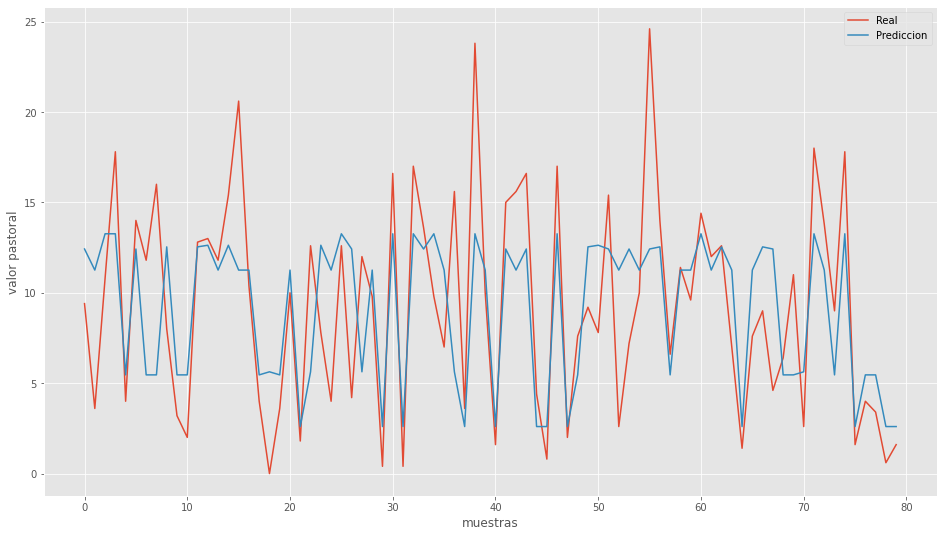

In [20]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(Y_pred_multiple)),Y_pred_multiple,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Cuarta predicción

Variables independientes (agrupadas por mm lluvia anual): 
- temperatura promedio maxima anual
- temperatura promedio minima anual
- temperatura promedio media anual
- humedad
- viento
- mm de lluvia acumulado Verano
- mm de lluvia acumulados Anual

Variables dependientes:
- Valor Pastoral

### Cargamos los datos nuevamente y quitamos algunos

In [21]:
df = pd.read_csv('datos/csv/datos_forraje_3_sondas.csv', sep=",")
df = df.drop(['codigo_gps', 'coordenada_completa', 'latitud','longitug', 'dist_laguna_fría','distancia_telsen','dist_gastre'], axis=1)
df

,feacha,fn_valor_pastoral,sonda_cercana,sonda_real,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,11/2015,3.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
1,11/2015,0.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
2,11/2015,1.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
3,11/2015,8.0,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
4,11/2015,4.4,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,15.4,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
196,01/2017,11.2,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
197,01/2017,13.0,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
198,01/2017,11.4,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6


## Agrupamos los datos por la lluvia acuulada anual

In [22]:
df = df.groupby(by='acum_anual',as_index=False).mean()
df

,acum_anual,fn_valor_pastoral,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,119.8,2.245161,13.7,14.3,2.6,8.5,14.2,53.7
1,142.3,5.865000,13.7,14.3,3.9,9.1,12.0,52.1
2,156.1,11.540000,42.3,19.8,7.2,13.6,5.1,48.6
3,160.7,1.200000,42.3,20.0,7.3,13.6,6.3,40.9
4,163.5,6.700000,42.3,20.0,7.3,13.6,6.3,40.9
5,206.9,15.200000,53.5,19.8,7.2,13.6,5.1,48.6
6,215.6,11.155556,53.5,19.8,7.2,13.6,5.1,48.6
7,288.1,12.348387,58.2,14.3,3.9,9.1,12.0,52.1
8,304.1,10.687805,58.2,14.3,3.9,9.1,12.0,52.1


### Miramos las correlaciones entre las variables

<AxesSubplot:>

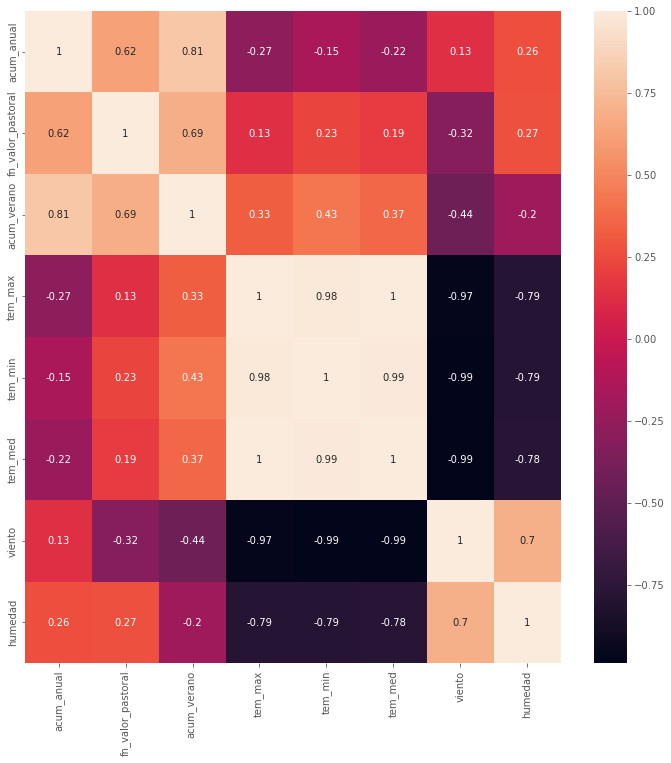

In [23]:
correlation_mat = df.corr()
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlation_mat, annot = True, ax = ax)

Según la matriz, el valor pastoral esta correlacionado en un 0.62 con la lluvia acumulada anual y 0.69 con la luvia acumulada en el verano. Y otras correlaciones mas bajan son 0.27 para humedad y 0.23 con temperatura minima. Hay una correlacion negativa de -0.32 para el viento

### Creando modelo

In [24]:
X_multiple = df[['acum_anual','acum_verano', 'tem_max', 'tem_min', 'tem_med', 'viento', 'humedad']]
y_multiple = df[['fn_valor_pastoral']]

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.4)

lr_multiple = linear_model.LinearRegression()

lr_multiple.fit(X_train, y_train)

LinearRegression()

### METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será. 

El problema del coeficiente de determinación, y razón por el cual surge el coeficiente de determinación ajustado, radica en que no penaliza la inclusión de variables explicativas no significativas. Es decir, si al modelo se añaden cinco variables explicativas que guardan poca relación con lo que se intenta predecir, el R cuadrado aumentará. Es por ello que muchos expertos económetras, estadísticos y matemáticos se oponen al uso del R cuadrado como medida representativa de la bondad del ajuste real.

Quizas se podría programar el coeficiente de determinación ajustado

In [25]:
Y_pred_multiple = lr_multiple.predict(X_test)

print('Precisión del modelo entrenamiento:')
print(str(round(lr_multiple.score(X_train, y_train),4))+'%')

print('Precisión del modelo test:')
print(str(round(lr_multiple.score(X_test, y_test),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, Y_pred_multiple),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, Y_pred_multiple),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, Y_pred_multiple),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test, Y_pred_multiple),4)),4)))
print('R2:')
print(str(round(r2_score(y_test, Y_pred_multiple),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', lr_multiple.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', lr_multiple.intercept_)

Precisión del modelo entrenamiento:
1.0%
Precisión del modelo test:
-274.2918%
Varianza Explicada:
-221.407
MAE:
32.0298
MSE:
1680.7065
RMSE:
40.9964
R2:
-274.2918
Coefficients: 
 [[  1.96428571  -8.58265306   6.01392149   5.08851949   5.73835113
  -11.28599709   0.97976026]]
Independent term: 
 [-155.85110039]


**No sé si hay algo mal en el codigo pero claramante todas las metricas dan horriblemente mal**

## Grafiquemos los resultados

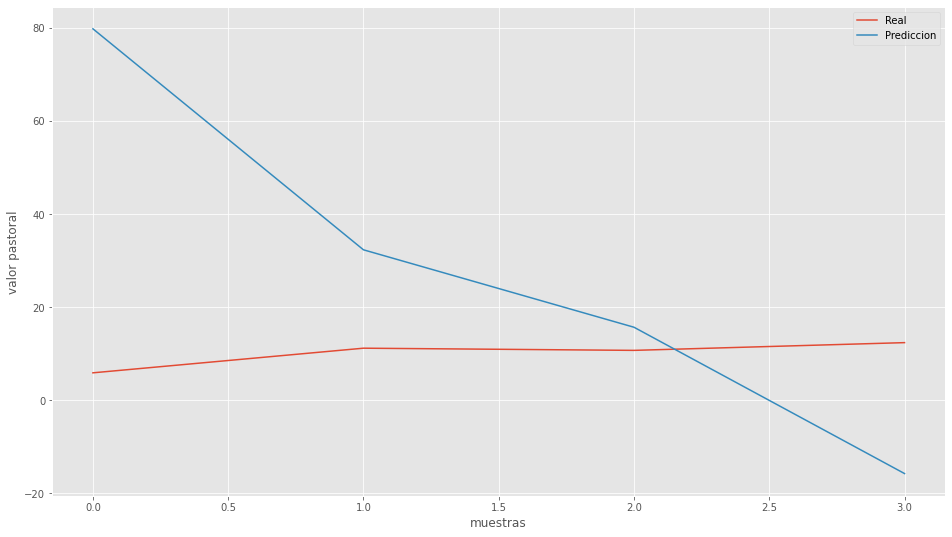

In [26]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(Y_pred_multiple)),Y_pred_multiple,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Comparar las 4 pruebas

In [30]:
tabla = pd.DataFrame(columns=['modelo', 'VE', 'MAE', 'MSE', 'RMSE','R2'],index=range(3))
tabla.iloc[0] = ('prediccion1',0.43,3.35,16.2,4.03,0.41)
tabla.iloc[1] = ('prediccion2',0.37,3.67,21.61,4.65,0.37)
tabla.iloc[2] = ('prediccion3',0.44,3.40,19.16,4.38,0.44)
tabla

,modelo,VE,MAE,MSE,RMSE,R2
0,prediccion1,0.43,3.35,16.2,4.03,0.41
1,prediccion2,0.37,3.67,21.61,4.65,0.37
2,prediccion3,0.44,3.4,19.16,4.38,0.44


No se agrego la prediccion 4 porque realmente funciona muy mal.

Si consideramos las metricas MAE Y RMSE como las mas significativas, el mejor modelo es el de la prediccion 1. 

Si consideramos la VE como la importante entonces el mejor modelo es el de la prediccion 3.

Si consideramos el R2 como el mas significativo, el modelo de la prediccion 3 es el mejor, considerando tambien que alcanzo 48% en algunas oportunidades.

Según diferentes lecturas el MSE y el R2 son las mas utilizadas para regresión, y si miramos las metricas de los modelos el valor de MSE en ninguno esta cerca de 0 y el valor de R2 en ninguno esta cerca de 1, lo cual indica que ninguno funciona bien.  

## CONCLUSIÓN: No se obtienen buenas metricas, están muy parecidas a la de regresio lineal simple

Links donde hablan de las metricas y porque no usar R2 para Regresion múltiple. 

https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/ 

https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html 

https://economipedia.com/definiciones/r-cuadrado-coeficiente-determinacion.html 